In [2]:
import numpy as np
import pandas as pd
import cbsyst as cb

## Load data

In [4]:
dat = pd.read_csv('Henehan_2015.csv', header=[0,1])

## Calculate carbon system

In [5]:
# Calculate from DIC and TA
sw = cb.CBsys(
    DIC=dat[('measured', 'DIC')],
    TA=dat[('measured', 'TA')],
    T_in=dat[('measured', 'temp_C')],
    S_in=dat[('measured', 'sal')],
)

# 4. add to dataframe
for v in ['DIC', 'TA', 'CO3', 'HCO3', 'CO2', 'pCO2', 'BO4', 'BO3', 'BT', 'T_in', 'S_in', 'P_in']:
    dat[('calculated', v)] = sw[v]

In [6]:
dat.sort_index(1).to_csv('Henehan_2015_compiled.csv')

In [17]:
import matplotlib.pyplot as plt
import uncertainties as un
import uncertainties.unumpy as unp
from scipy import stats
from sklearn import metrics

(-1.785376160376577+/-9.268512263272404,
 135.34296905886873+/-64.70102344713752)

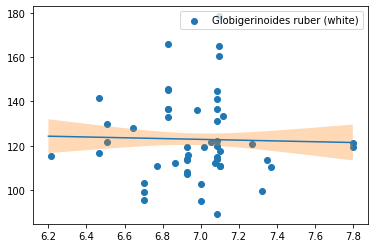

In [13]:
for s in dat.metadata.species.unique():
    ind = dat.metadata.species == s
    plt.scatter(dat.calculated.BO4[ind] / dat.calculated.CO3[ind]**0.5, dat.measured['B/Ca'][ind], label=s)
    
plt.legend()

p, cov = np.polyfit(dat.calculated.BO4[ind] / dat.calculated.CO3[ind]**0.5, dat.measured['B/Ca'][ind], 1, cov=True)
pu = un.correlated_values(p, cov)

xn = np.linspace(6.2, 7.8)
pred = np.polyval(pu, xn)
plt.plot(xn, unp.nominal_values(pred))
plt.fill_between(xn, unp.nominal_values(pred) - unp.std_devs(pred), unp.nominal_values(pred) + unp.std_devs(pred), alpha=0.3)

pu

In [21]:
metrics.r2_score(dat.measured['B/Ca'][ind], np.polyval(p, dat.calculated.BO4[ind] / dat.calculated.CO3[ind]**0.5))

0.000741561587060735